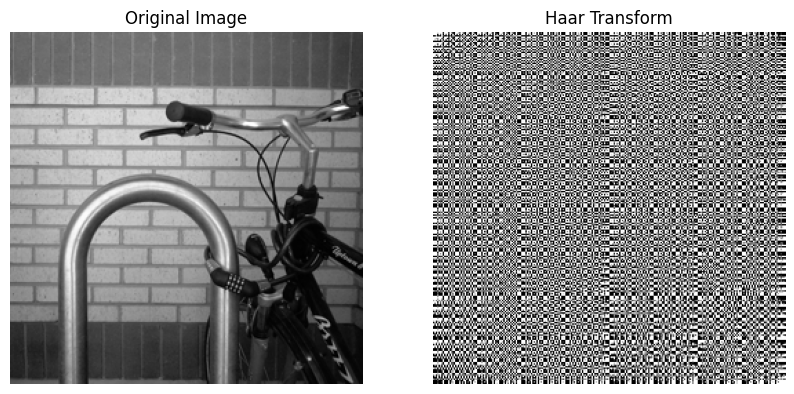

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === Fungsi untuk membuat Haar matrix ===
def haar_matrix(n):
    """Generate Haar transform matrix of size n x n (n must be power of 2)."""
    if n == 1:
        return np.array([[1]])
    else:
        H = haar_matrix(n // 2)
        top = np.kron(H, [1, 1])
        bottom = np.kron(np.eye(len(H)), [1, -1])
        return np.vstack((top, bottom)) / np.sqrt(2)

# === Load gambar ===
img = np.array(Image.open('croppedBike.png').convert('L'), dtype=float)  # grayscale

# === Buat Haar matrices ===
H1 = haar_matrix(img.shape[0])
H2 = haar_matrix(img.shape[1])

# === Lakukan Haar Transform ===
haarCoeff = H1.T @ img @ H2

# === Tampilkan hasil ===
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(haarCoeff, cmap='gray', vmin=-50, vmax=50)
plt.title('Haar Transform')
plt.axis('off')

plt.show()
